<a href="https://colab.research.google.com/github/Samar999-bit/My-end-to-end-project/blob/main/end_to_end_bulldozer_price_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the sale prices of bulldozers using machine learning
>In this notebook we will be working on an end to end machine learning project to predict the prices of bulldozers.

#1)Problem Definition
  > how well can we predict the future sale prices of a bulldozer , given its characterisitics and previous examples of how much similar bulldozers have been sold for.





#2)Data
>the data is downloaded from Kaggle bluebook for bulldozers competition:

>there are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.




#3)Evaluation
>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

>For more on the evaluation on this project check :
www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

#4)Features
>Kaggle provides a data dictionary detailing all the important features of the dataset:
https://1drv.ms/x/c/845c3fa88cf3f37f/EeEKLfeL3bhOn5JH3x_J-LgBcyq5pzbLSfzkgVkaEpWpyw?e=YxGjxv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Training and Validation datasets
df = pd.read_csv("Data/TrainAndValid.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

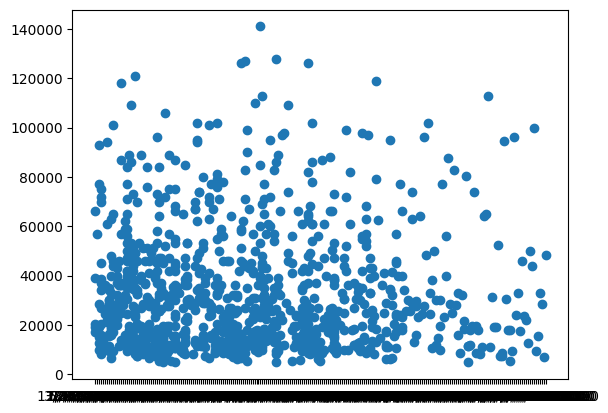

In [ ]:
plt.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

(array([151074., 119019.,  58000.,  32444.,  22876.,  13474.,   9330.,
          3884.,   2036.,    561.]),
 array([  4750.,  18475.,  32200.,  45925.,  59650.,  73375.,  87100.,
        100825., 114550., 128275., 142000.]),
 <BarContainer object of 10 artists>)

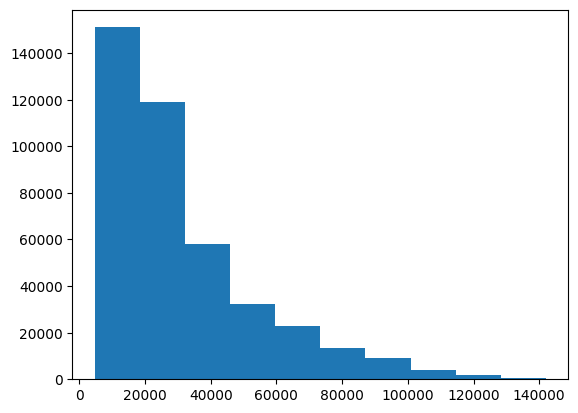

In [ ]:
plt.hist(df['SalePrice'])

In [ ]:
df.saledate[:1000]

,saledate
0,11/16/2006 0:00
1,3/26/2004 0:00
2,2/26/2004 0:00
3,5/19/2011 0:00
4,7/23/2009 0:00
...,...
995,7/16/2009 0:00
996,6/14/2007 0:00
997,9/22/2005 0:00
998,7/28/2005 0:00


In [ ]:
df.saledate.dtype

dtype('O')

In [ ]:
#Import data again but this time parse dates
df = pd.read_csv("Data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])


In [ ]:
df.saledate

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
...,...
412693,2012-03-07
412694,2012-01-28
412695,2012-01-28
412696,2012-03-07


In [ ]:
df.saledate.dtype

dtype('<M8[ns]')

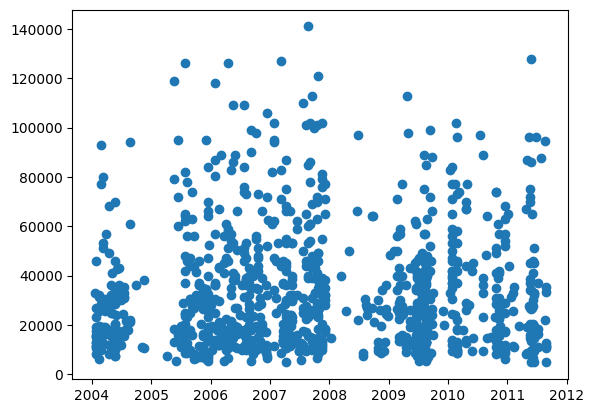

In [ ]:
plt.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [ ]:
df.saledate.head(30)

,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23
5,2008-12-18
6,2004-08-26
7,2005-11-17
8,2009-08-27
9,2007-08-09


In [ ]:
# Sort dataframe in date order
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head(30)

,saledate
205615,1989-01-17
274835,1989-01-31
141296,1989-01-31
212552,1989-01-31
62755,1989-01-31
54653,1989-01-31
81383,1989-01-31
204924,1989-01-31
135376,1989-01-31
113390,1989-01-31


In [ ]:
#Making a copy
df_tmp = df.copy()

In [ ]:
#add datetime attributes for saledate column
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear
df_tmp['saleQuarter'] = df_tmp.saledate.dt.quarter

In [ ]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
#now we can remove 'saledate'
df_tmp.drop('saledate', axis=1, inplace=True)

In [ ]:
df_tmp.state.value_counts()

,count
state,
Florida,67320
Texas,53110
California,29761
Washington,16222
Georgia,14633
Maryland,13322
Mississippi,13240
Ohio,12369
Illinois,11540


In [ ]:
df_tmp.fiBaseModel.value_counts()

,count
fiBaseModel,
580,20179
310,17886
D6,13527
416,12900
D5,9636
...,...
CK35,1
932,1
G970,1


In [ ]:
df_tmp.ProductGroup.value_counts()

,count
ProductGroup,
TEX,104230
TTT,82582
BL,81401
WL,73216
SSL,45011
MG,26258


In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

# Converting string to categories
>One way we can turn all of our data into numbers is by converting them into pandas categories.

In [ ]:
#find the column which contain strings
for label, content in df_tmp.items():
  if pd.api.types.is_object_dtype(content):
    print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
  if pd.api.types.is_object_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [ ]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [ ]:
df_tmp.state.cat.codes

,0
205615,43
274835,8
141296,8
212552,8
62755,8
...,...
410879,4
412476,4
411927,4
407124,4


We have converted the data into numbers now

Byt we still a lot of missing values

# Filling missing values
## numeric ones first

In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear
saleQuarter


In [ ]:
# check for which labels have missing values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # add a binary column which tells us if the data was missing
      df_tmp[label+'_is_missing'] = pd.isnull(content)
      # fill missing numeric values with median
      df_tmp[label] = content.fillna(content.median())

In [ ]:
# chek if there are any null numerical values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)


In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 60 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null  category
 11  

filling categorical values

In [ ]:
# check for which labels have missing values
for label, content in df_tmp.items():
  if pd.api.types.is_categorical_dtype(content):
    if pd.isnull(content).sum():
      print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


/tmp/ipython-input-31-459314976.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):


In [ ]:
#Turn Categorical values into numbers and fill missing
for label, content in df_tmp.items():
  if pd.api.types.is_categorical_dtype(content):
    # add binary column to indicate whether sample had missing value
    df_tmp[label+'_is_missing'] = pd.isnull(content)
    # turn categories into numbers and add+1
    df_tmp[label] = pd.Categorical(content).codes+1

/tmp/ipython-input-32-2048898244.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
/tmp/ipython-input-32-2048898244.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
/tmp/ipython-input-32-2048898244.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
/tmp/ipython-input-32-2048898244.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
/tmp/ipython-input-32-2048898244.py:3: DeprecationWarning: i

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 104 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(6), int64(5), int8(40)
memory usage: 74.8 MB


In [ ]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


# Modelling



In [ ]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]
len(df_train), len(df_val)

(401125, 11573)

In [ ]:
x_train , y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
x_valid , y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, max_samples=10000)
model.fit(x_train, y_train)


CPU times: user 47.8 s, sys: 295 ms, total: 48.1 s
Wall time: 28.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

# buliding an evaluation function

In [ ]:
from sklearn.metrics import mean_squared_log_error, r2_score
def rmsle(y_test, y_preds):
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [ ]:
rmsle(y_valid, model.predict(x_valid))

np.float64(0.2933313432786509)

In [ ]:
model.score(x_valid, y_valid)

0.8339781943895145

#hyperparameter tuning

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rs_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None,10,20],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rs_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 1h 42min, sys: 42.7 s, total: 1h 42min 42s
Wall time: 1h 42min 54s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
rs_model.best_params_

{'n_estimators': np.int64(60),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_depth': 20}

In [ ]:
%%time
model = RandomForestRegressor(n_estimators= 40,
 min_samples_split=10,
 min_samples_leaf= 1,
 max_depth= 20,
                             random_state = 42 )

model.fit(x_train, y_train)


CPU times: user 5min 2s, sys: 494 ms, total: 5min 2s
Wall time: 5min 3s


RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=40,
                      random_state=42)

In [ ]:
rmsle(y_valid, model.predict(x_valid))

np.float64(0.2530659156742487)

#Make predictions on test data

In [ ]:
df_test = pd.read_csv("Data/Test.csv",
                      parse_dates=["saledate"])

Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [ ]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df["saleQuarter"] = df.saledate.dt.quarter

    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

    return df

In [ ]:
df_test = preprocess_data(df_test)
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int32(6), int64(6), int8(42)
memory usage: 2.0 MB


In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 104 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(6), int64(5), int8(40)
memory usage: 74.8 MB


In [ ]:
set(df_tmp.columns) - set(df_test.columns)

{'SalePrice', 'auctioneerID_is_missing'}

In [ ]:
df_test["auctioneerID_is_missing"] = False

In [ ]:
test_preds=model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True
Steering_Controls_is_missing,True,False,True,True,True


In [ ]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [ ]:
df_tmp.columns.get_loc("auctioneerID_is_missing")

58

In [ ]:
test_preds = model.predict(df_test)

In [ ]:
test_preds

array([20754.50751828, 19401.89927609, 47549.98409393, ...,
       11488.61795653, 16679.08182096, 32497.57017288])

We've made some predictions but they're not in the same format Kaggle is asking for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [ ]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,20754.507518
1,1227844,19401.899276
2,1227847,47549.984094
3,1227848,88235.610272
4,1227863,57553.839250
...,...,...
12452,6643171,53275.245761
12453,6643173,11151.655544
12454,6643184,11488.617957
12455,6643186,16679.081821


In [ ]:
# Export prediction data
df_preds.to_csv("test_predictions.csv", index=False)

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'bulldozer_price_model.pkl')

['bulldozer_price_model.pkl']